#K-NEAREST NEIGHBORS (KNN)

##Problem Statement
Predict whether a tumor is benign or malignant based on medical measurements.

##Dataset (Kaggle – Public)
Breast Cancer Dataset
Dataset Link: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

##Target Variable:
Diagnosis (Benign / Malignant)

#Input Feature:
• Radius
• Texture
• Perimeter
• Area
• Smoothness


Rohith John 24BAD100
Best K value found: 9

--- KNN Performance Metrics ---
Accuracy:  0.9708
Precision: 0.9677
Recall:    0.9524
F1 Score:  0.9600

Total misclassified cases: 5


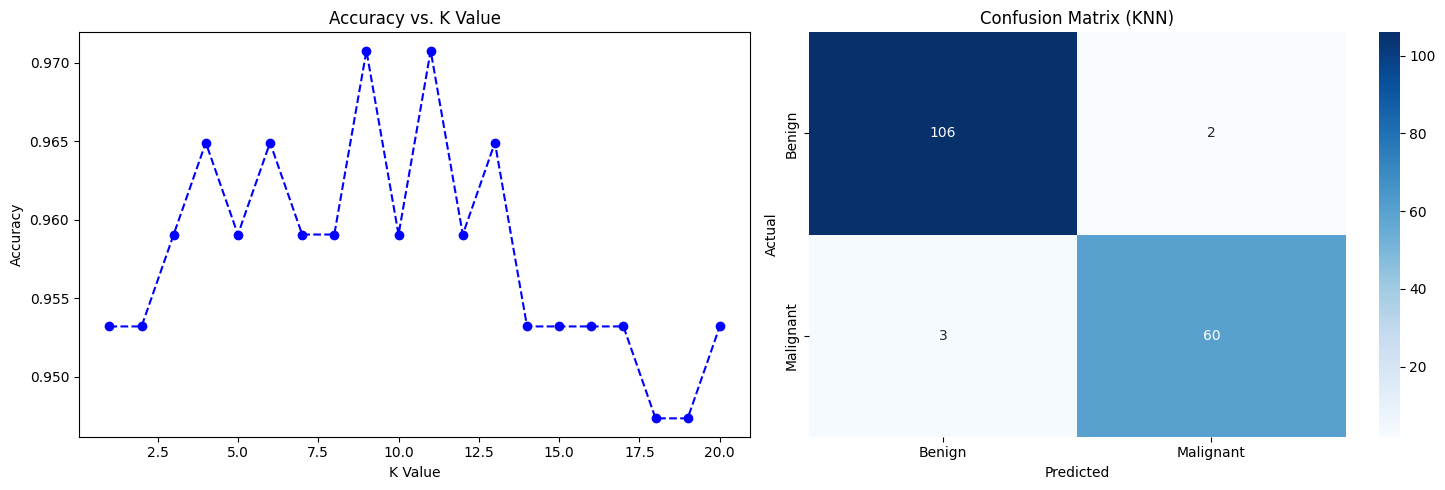

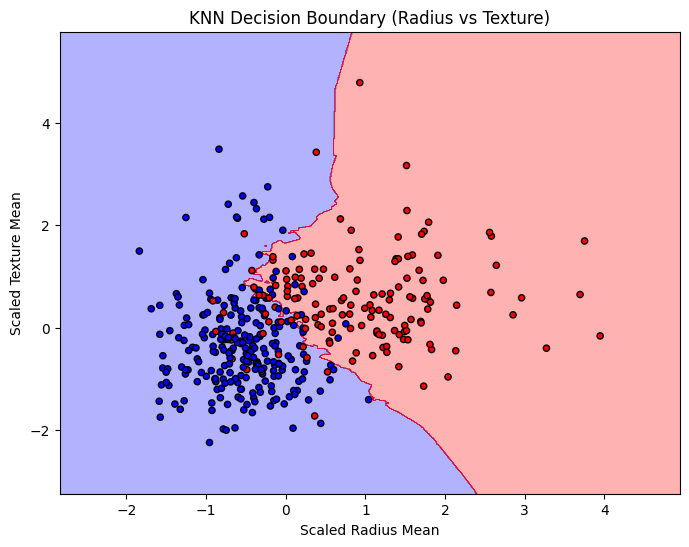

In [1]:
# 1. Import required Python libraries [cite: 25]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from matplotlib.colors import ListedColormap
df = pd.read_csv('breast-cancer.csv')
print("Rohith John 24BAD100")
if 'id' in df.columns:
    df = df.drop('id', axis=1)
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))
# Find best K
best_k = k_values[np.argmax(accuracies)]
print(f"Best K value found: {best_k}")

# Train final model with best K
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
# 9. Predict diagnosis labels [cite: 33]
y_pred_final = final_knn.predict(X_test_scaled)
# 10. Evaluate performance [cite: 34]
print("\n--- KNN Performance Metrics ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_final):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_final):.4f}")
# 11. Identify misclassified cases [cite: 35]
misclassified_idx = np.where(y_test != y_pred_final)[0]
print(f"\nTotal misclassified cases: {len(misclassified_idx)}")
# 13. Visualization [cite: 37]
plt.figure(figsize=(15, 5))
# Accuracy vs K Plot [cite: 39]
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='blue')
plt.title('Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
# Confusion Matrix [cite: 38]
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Decision Boundary (using two features for visualization purposes) [cite: 40]
# We select 'radius_mean' and 'texture_mean' (usually the first two columns)
X_viz = X.iloc[:, :2].values
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_viz, y, test_size=0.3, random_state=42)
scaler_v = StandardScaler()
X_train_v = scaler_v.fit_transform(X_train_v)
knn_viz = KNeighborsClassifier(n_neighbors=best_k)
knn_viz.fit(X_train_v, y_train_v)
x_min, x_max = X_train_v[:, 0].min() - 1, X_train_v[:, 0].max() + 1
y_min, y_max = X_train_v[:, 1].min() - 1, X_train_v[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = knn_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('blue', 'red')))
plt.scatter(X_train_v[:, 0], X_train_v[:, 1], c=y_train_v, cmap=ListedColormap(('blue', 'red')), edgecolor='k', s=20)
plt.title('KNN Decision Boundary (Radius vs Texture)')
plt.xlabel('Scaled Radius Mean')
plt.ylabel('Scaled Texture Mean')
plt.show()

#DECISION TREE CLASSIFIER

##Problem Statement
Predict whether a loan application should be approved or rejected.

##Dataset (Public / Standard Dataset)
Loan Prediction Dataset
Dataset Link: https://www.kaggle.com/datasets/ninzaami/loan-predication

##Target Variable: Loan Status (Approved / Rejected)

##Input Features
• Applicant Income
• Loan Amount
• Credit History
• Education
• Property Area


Accuracy:  0.7784
Precision: 0.7516
Recall:    0.9833
F1 Score:  0.8520

Deep Tree Training Accuracy: 1.0000
Deep Tree Testing Accuracy:  0.6432


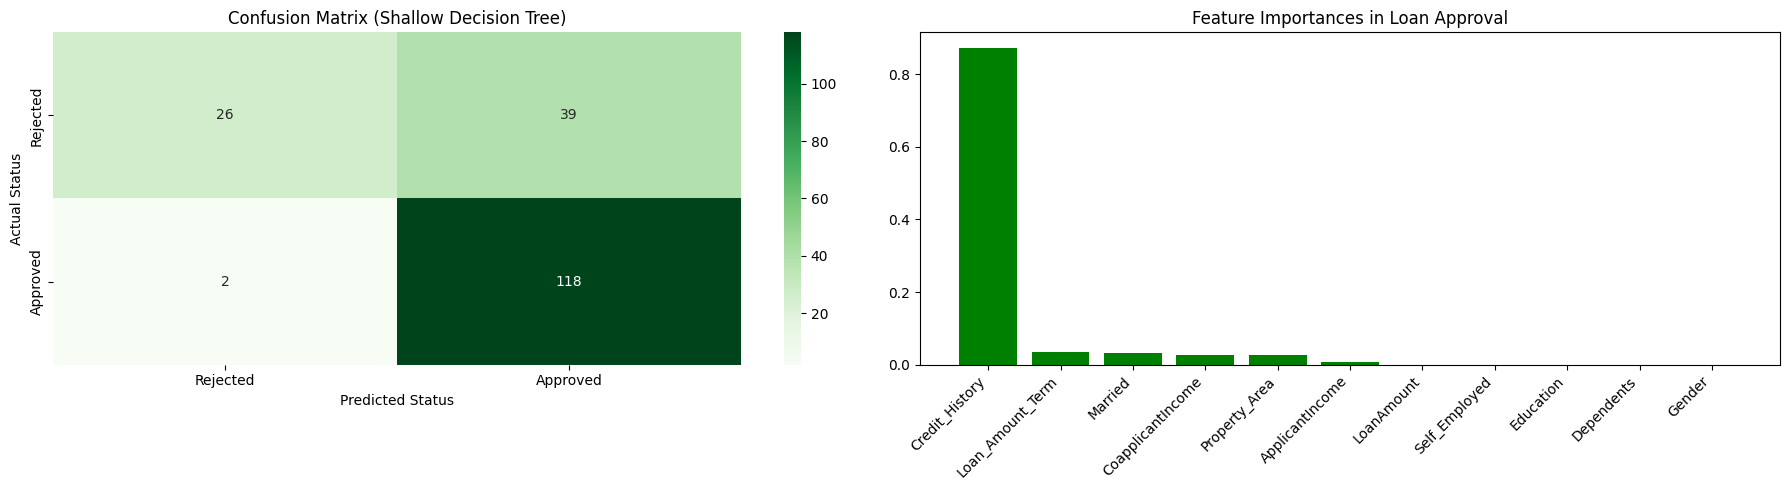

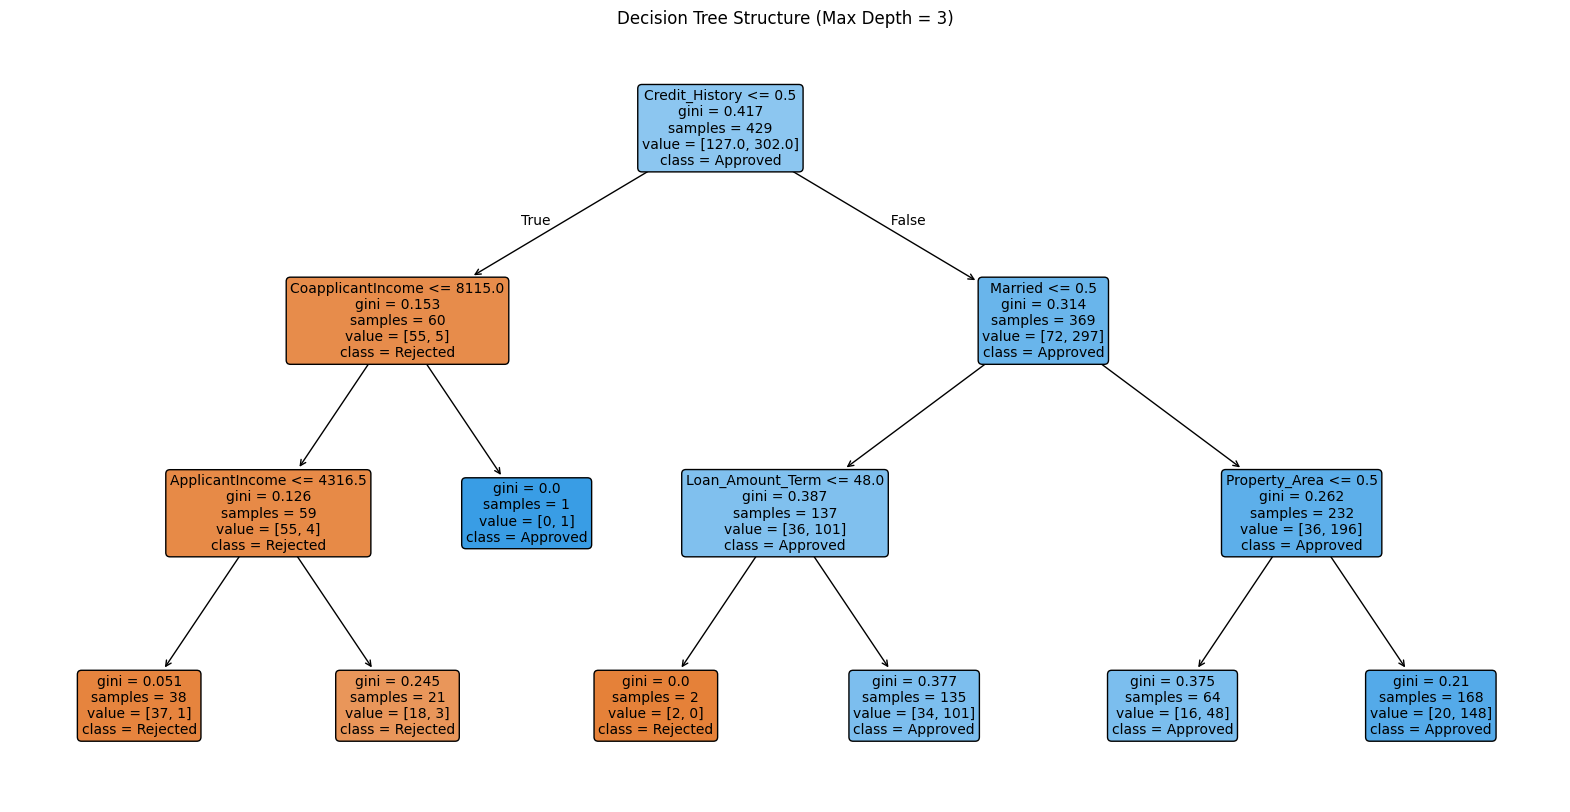

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('dataset.csv')

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis=1)

le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

deep_tree = DecisionTreeClassifier(random_state=42)
deep_tree.fit(X_train, y_train)

shallow_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
shallow_tree.fit(X_train, y_train)

y_pred_deep = deep_tree.predict(X_test)
y_pred_shallow = shallow_tree.predict(X_test)
y_train_pred_deep = deep_tree.predict(X_train)

print(f"Accuracy:  {accuracy_score(y_test, y_pred_shallow):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_shallow):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_shallow):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_shallow):.4f}\n")

print(f"Deep Tree Training Accuracy: {accuracy_score(y_train, y_train_pred_deep):.4f}")
print(f"Deep Tree Testing Accuracy:  {accuracy_score(y_test, y_pred_deep):.4f}")

plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
cm_tree = confusion_matrix(y_test, y_pred_shallow)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix (Shallow Decision Tree)')
plt.xlabel('Predicted Status')
plt.ylabel('Actual Status')

plt.subplot(1, 2, 2)
importances = shallow_tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align="center", color='green')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45, ha='right')
plt.title("Feature Importances in Loan Approval")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(shallow_tree, feature_names=X.columns, class_names=['Rejected', 'Approved'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure (Max Depth = 3)")
plt.show()